In [1]:
%matplotlib inline

In [43]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from xgboost import XGBClassifier

In [3]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

/usr/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-11-12 18:00:14.983120. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [4]:
data = pd.read_csv("../data/train.csv", na_values=[-1, -1.0], index_col="id")
X, y = data.loc[:, data.columns != "target"], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
resampler = RandomUnderSampler()
indexes = X_train.index.values.reshape(-1, 1)
index_res, y_res = resampler.fit_sample(indexes, y_train)
X_res = X_train.loc[index_res.flatten(), :]

/usr/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-11-12 18:00:15.004841. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Standard Scaling 

In [46]:
data = pd.read_csv("../data/train.csv", na_values=[-1, -1.0], index_col="id")
X, y = data.loc[:, data.columns != "target"], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
resampler = RandomUnderSampler()
indexes = X_train.index.values.reshape(-1, 1)
index_res, y_res = resampler.fit_sample(indexes, y_train)
X_res = X_train.loc[index_res.flatten(), :]
X_mean = X_res.fillna(X_res.mean())
X_test = X_test.fillna(X_test.mean())

/usr/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [47]:
float_cols = X_mean.columns[(~X_mean.columns.str.contains("bin|cat")) & (X_mean.dtypes == "float64")]
scaler = StandardScaler()
scaler.fit(X_mean[float_cols])
X_mean[float_cols] = scaler.transform(X_mean[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

In [48]:
model = XGBClassifier()
model.fit(X_mean, y_res)
y_pred = model.predict(X_test)
std_gini = gini_normalized(y_test, y_pred)
print(std_gini)

0.195259842231


## Robust Scaling 

In [50]:
data = pd.read_csv("../data/train.csv", na_values=[-1, -1.0], index_col="id")
X, y = data.loc[:, data.columns != "target"], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
resampler = RandomUnderSampler()
indexes = X_train.index.values.reshape(-1, 1)
index_res, y_res = resampler.fit_sample(indexes, y_train)
X_res = X_train.loc[index_res.flatten(), :]
X_mean = X_res.fillna(X_res.mean())
X_test = X_test.fillna(X_test.mean())

/usr/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [51]:
float_cols = X_mean.columns[(~X_mean.columns.str.contains("bin|cat")) & (X_mean.dtypes == "float64")]
scaler = RobustScaler()
scaler.fit(X_mean[float_cols])
X_mean[float_cols] = scaler.transform(X_mean[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

In [52]:
model = XGBClassifier()
model.fit(X_mean, y_res)
y_pred = model.predict(X_test)

robust_gini = gini_normalized(y_test, y_pred)
print(robust_gini)

0.196929085959


## MaxAbsScaler 

In [53]:
data = pd.read_csv("../data/train.csv", na_values=[-1, -1.0], index_col="id")
X, y = data.loc[:, data.columns != "target"], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
resampler = RandomUnderSampler()
indexes = X_train.index.values.reshape(-1, 1)
index_res, y_res = resampler.fit_sample(indexes, y_train)
X_res = X_train.loc[index_res.flatten(), :]
X_mean = X_res.fillna(X_res.mean())
X_test = X_test.fillna(X_test.mean())

/usr/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [54]:
float_cols = X_mean.columns[(~X_mean.columns.str.contains("bin|cat")) & (X_mean.dtypes == "float64")]
scaler = MaxAbsScaler()
scaler.fit(X_mean[float_cols])
X_mean[float_cols] = scaler.transform(X_mean[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

In [55]:
model = XGBClassifier()
model.fit(X_mean, y_res)
y_pred = model.predict(X_test)

maxabs_gini = gini_normalized(y_test, y_pred)
print(maxabs_gini)

0.189131271757


## MinMaxScaler

In [60]:
data = pd.read_csv("../data/train.csv", na_values=[-1, -1.0], index_col="id")
X, y = data.loc[:, data.columns != "target"], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
resampler = RandomUnderSampler()
indexes = X_train.index.values.reshape(-1, 1)
index_res, y_res = resampler.fit_sample(indexes, y_train)
X_res = X_train.loc[index_res.flatten(), :]
X_mean = X_res.fillna(X_res.mean())
X_test = X_test.fillna(X_test.mean())

/usr/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [61]:
float_cols = X_mean.columns[(~X_mean.columns.str.contains("bin|cat")) & (X_mean.dtypes == "float64")]
scaler = MinMaxScaler()
scaler.fit(X_mean[float_cols])
X_mean[float_cols] = scaler.transform(X_mean[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

In [62]:
model = XGBClassifier()
model.fit(X_mean, y_res)
y_pred = model.predict(X_test)

minmax_gini = gini_normalized(y_test, y_pred)
print(minmax_gini)

0.195335331308


## Results 

<Container object of 4 artists>

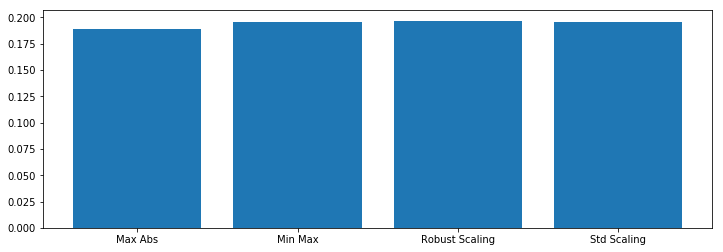

In [63]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(["Std Scaling", "Robust Scaling", "Max Abs", "Min Max"], [std_gini, robust_gini, maxabs_gini, minmax_gini])